# Informações

In [25]:
# https://arm-doe.github.io/pyart/examples/mapping/plot_map_two_radars_to_grid.html#sphx-glr-examples-mapping-plot-map-two-radars-to-grid-py
# https://arm-doe.github.io/pyart/examples/plotting/plot_three_panel_gridmapdisplay.html#sphx-glr-examples-plotting-plot-three-panel-gridmapdisplay-py

# Função

In [132]:
import time
#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label, linestyle):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, linestyle=linestyle)

#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile, cor, espessura_linha):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import matplotlib.pyplot as plt

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor=cor, facecolor='none', linewidth=espessura_linha)

#-----------------------------------------------------------------------------------
# Função que plota as siglas
#-----------------------------------------------------------------------------------
def plot_siglas_statesb():

    color = 'gray'

    ax.annotate('RS', xy=(-55.0, -28.5),fontsize=15, color='black')
    ax.annotate('SC', xy=(-51.2, -27.3), fontsize=15, color='black')
    ax.annotate('PR', xy=(-50.0, -25.6), fontsize=15, color='black')
    #ax.annotate('SP', xy=(-49.0, -22.5), fontsize=15, color=color)
    #ax.annotate('MG', xy=(-46.1, -21.0), fontsize=15, color=color)
    #ax.annotate('MS', xy=(-55.0, -21.0), fontsize=15, color=color)

    ax.annotate('Atlantic Ocean', xy=(-49.6, -31.9), fontsize=15, color=color)
    ax.annotate('Paraguay', xy=(-57.2, -26.0), fontsize=15, color=color)
    ax.annotate('Uruguay', xy=(-57.2, -33.0), fontsize=15, color=color)

# Figura simples: Py-art e Matplotlib

1 1000 1000
CPU times: total: 16.9 s
Wall time: 17.1 s


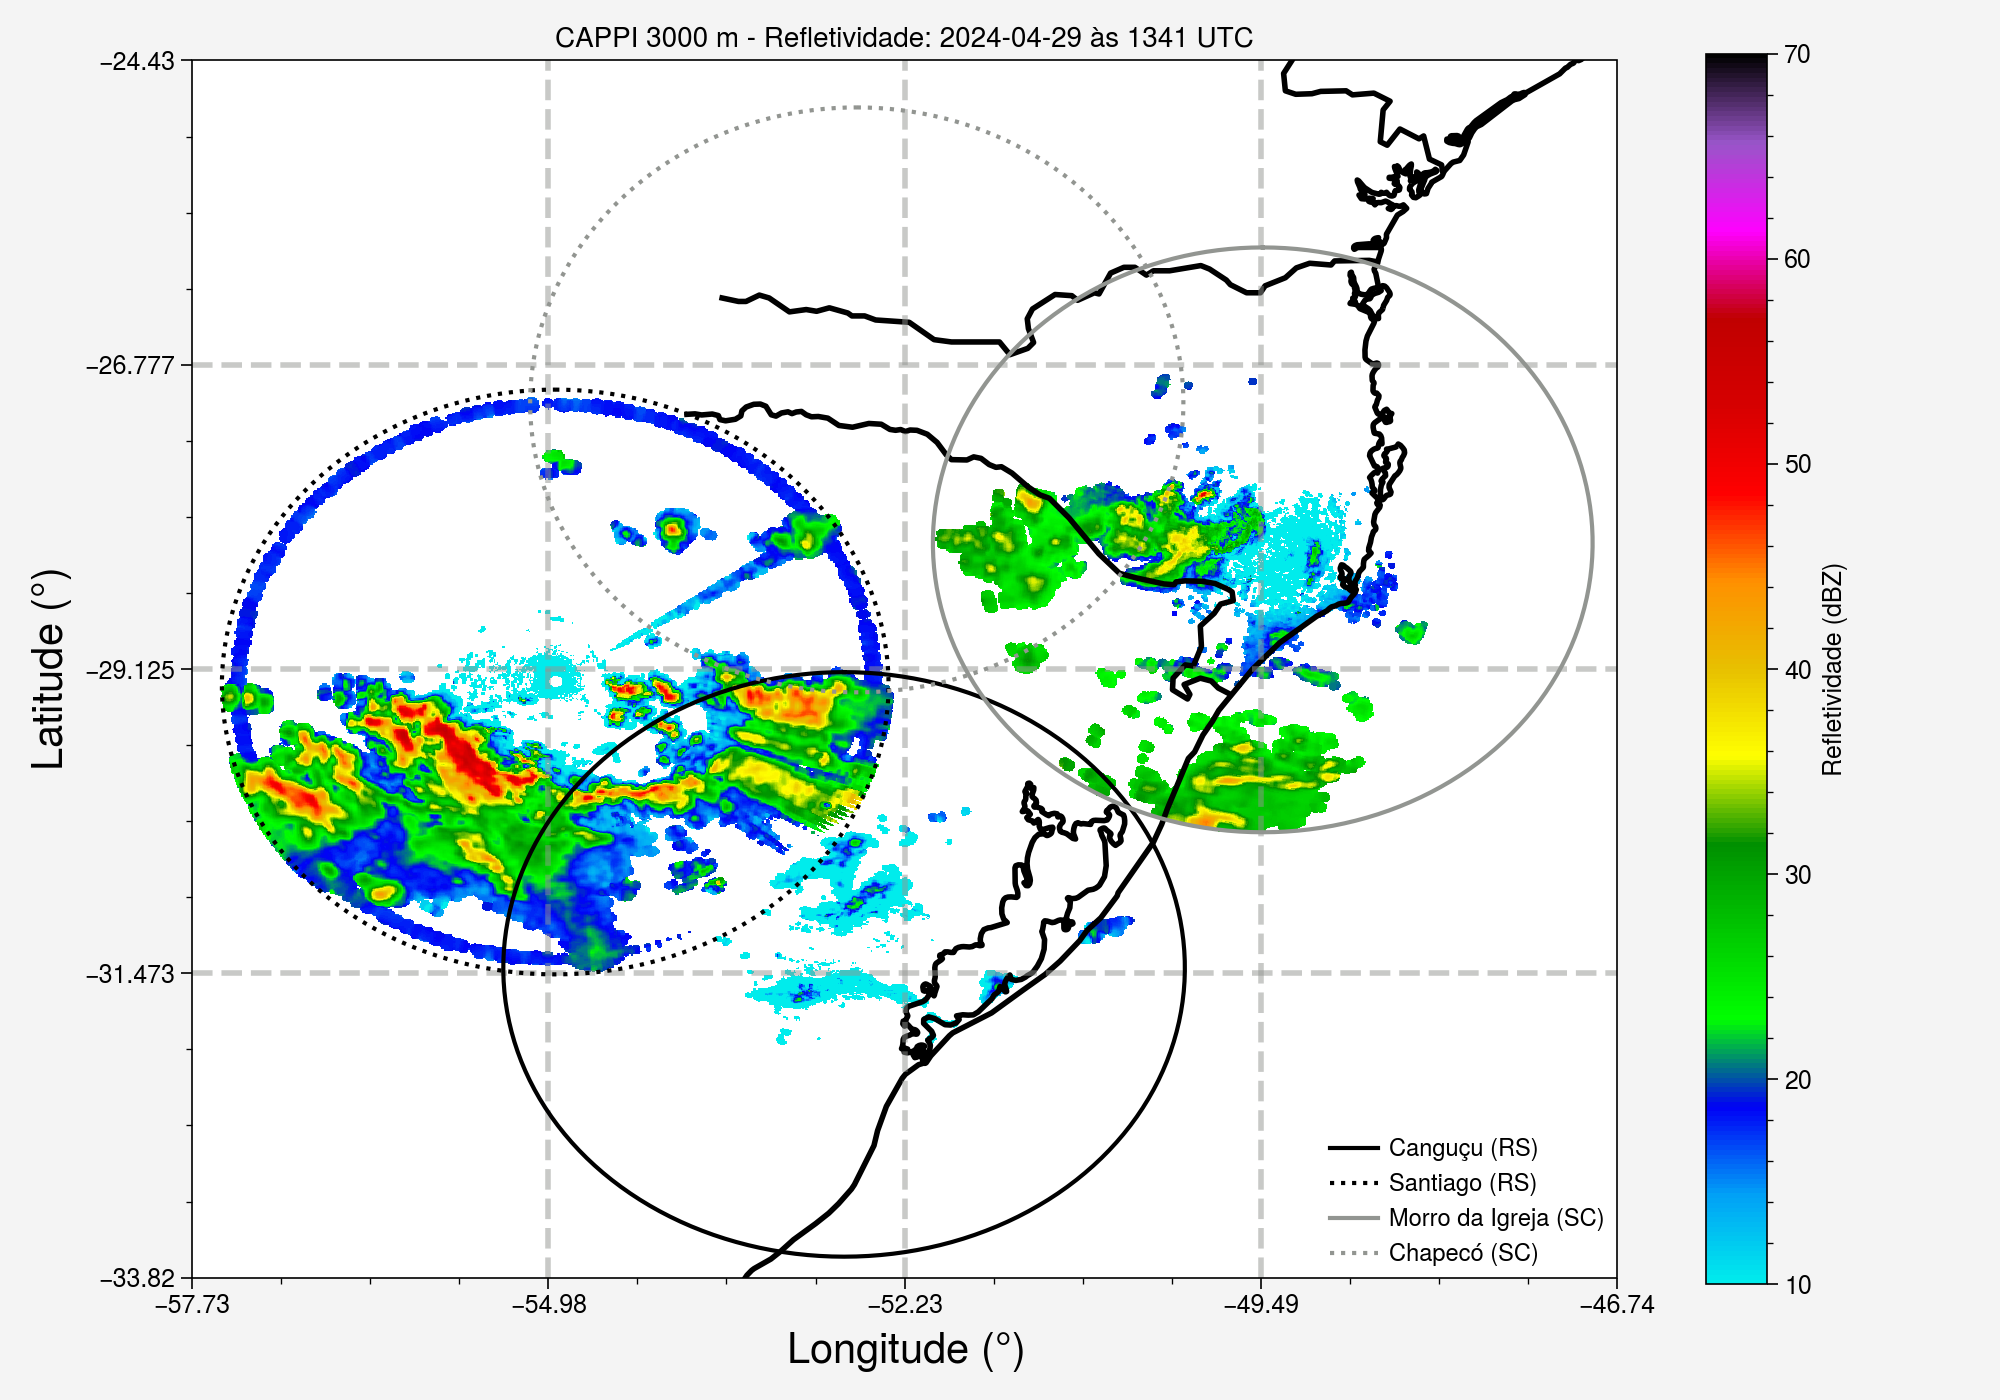

In [144]:
%%time
#========================================================================================================================#
#                                             IMPORTA BIBLIOTECAS
#========================================================================================================================#
import pyart 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import geopy                              
from geopy import distance  
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                        LEITURA DOS ARQUIVOS DOS RADARES
#========================================================================================================================#
# 2024-04-29 1340 UTC 

#-----------------------------------------------------------#
#                    nomes dos arquivos
#-----------------------------------------------------------#
file_cangucu = 'cangucu/2024-04-29/CGU-250--2024-04-29--13-40-23.mvol'
file_santiago = 'santiago/2024-04-29/STI-250--2024-04-29--13-40-23.mvol'
file_morrodaigreja = 'morrodaigreja/2024-04-29/MDI-250--2024-04-29--13-40-24.mvol'
file_chapeco = 'chapeco/2024-04-29/217BRS-20240429134204.HDF5'

#-----------------------------------------------------------#
#                      leitura dos dados
#-----------------------------------------------------------#
radar_cangucu = pyart.aux_io.read_gamic(file_cangucu)
radar_santiago = pyart.aux_io.read_gamic(file_santiago)
radar_morrodaigreja = pyart.aux_io.read_gamic(file_morrodaigreja)
radar_chapeco = pyart.aux_io.read_gamic(file_chapeco)
#print(pd.DataFrame(radar_cangucu.fields.keys()),'\n',
#      pd.DataFrame(radar_santiago.fields.keys()), '\n',
#      pd.DataFrame(radar_morrodaigreja.fields.keys()),'\n',
#      pd.DataFrame(radar_chapeco.fields.keys()))

#-----------------------------------------------------------#
#             extração da data da imagem
#-----------------------------------------------------------#
ano = str(pyart.util.datetime_from_grid(radar_cangucu).year)
mes = str(pyart.util.datetime_from_grid(radar_cangucu).month).zfill(2)
dia = str(pyart.util.datetime_from_grid(radar_cangucu).day).zfill(2)
hor = str(pyart.util.datetime_from_grid(radar_cangucu).hour).zfill(2)
min = str(pyart.util.datetime_from_grid(radar_cangucu).minute).zfill(2)

#-----------------------------------------------------------#
#            latitude e longitude dos radares
#-----------------------------------------------------------#
lat_radar_cangucu, lon_radar_cangucu = radar_cangucu.latitude['data'][0], radar_cangucu.longitude['data'][0]
lat_radar_santiago, lon_radar_santiago = radar_santiago.latitude['data'][0], radar_santiago.longitude['data'][0]
lat_radar_morrodaigreja, lon_radar_morrodaigreja = radar_morrodaigreja.latitude['data'][0], radar_morrodaigreja.longitude['data'][0]
lat_radar_chapeco, lon_radar_chapeco = radar_chapeco.latitude['data'][0], radar_chapeco.longitude['data'][0]
#print(lat_radar_cangucu, lon_radar_cangucu)
#print(lat_radar_santiago, lon_radar_santiago)
#print(lat_radar_morrodaigreja, lon_radar_morrodaigreja)
#print(lat_radar_chapeco, lon_radar_chapeco)

#-----------------------------------------------------------#
#            altitude dos radares
#-----------------------------------------------------------#
altitude_cangucu = radar_cangucu.altitude['data'][0]
altitude_santiago = radar_santiago.altitude['data'][0]
altitude_morrodaigreja = radar_morrodaigreja.altitude['data'][0]
altitude_chapeco = radar_chapeco.altitude['data'][0]
altitude_media = (altitude_cangucu+altitude_santiago+altitude_morrodaigreja+altitude_chapeco)/4.
#print(altitude_cangucu, altitude_santiago, altitude_morrodaigreja, altitude_chapeco, altitude_media)

#-----------------------------------------------------------#
#            define a altitude do CAPPI
#-----------------------------------------------------------#
cappi_altitude_escolhido = 3000
if (cappi_altitude < altitude_media):
    print('erro: altura do cappi menor que a altitude do radar')

# subtrai a altitude do radar
cappi_altitude = cappi_altitude_escolhido - altitude_media

#-----------------------------------------------------------#
#              definições da grade do CAPPI
#-----------------------------------------------------------#
# função que calcula a quantidade de pontos em x, y e z
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0]) / resolution)

# limites da grade
z_grid_limits = (cappi_altitude, cappi_altitude+1000)
y_grid_limits = (-500_000., 500_000.)
x_grid_limits = (-250_000., 750_000.)

# resolução da grade em metros
grid_resolution = 1000

# pontos em X, Y e Z
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
print(z_grid_points, y_grid_points, x_grid_points)

#-----------------------------------------------------------#
#                          gera cappi
#-----------------------------------------------------------#
cappi = pyart.map.grid_from_radars((radar_santiago, radar_cangucu, radar_morrodaigreja),
                                   
                                   grid_shape = (z_grid_points,
                                                 y_grid_points,
                                                 x_grid_points),
                                   
                                   grid_limits = (z_grid_limits,     # alturas
                                                  y_grid_limits,     # latitudes
                                                  x_grid_limits),    # longitudes
                                   
                                   gridding_algo = 'map_gates_to_grid',
                                   
                                   fields = ["corrected_reflectivity"])    

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig = plt.figure(figsize=(10,7))

# define os eixos e projeção da figura
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# plota o cappi
display.plot_grid("corrected_reflectivity",
                  level=0,
                  vmin=10,
                  vmax=70,
                  ax=ax,
                  cmap='pyart_NWSRef',
                  colorbar_label='Refletividade (dBZ)')                  
                 # shapefile='https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019',
                 # shapefile_kwargs= {'color': 'black', 'alpha': 0.3, 'zorder': 3, 'edgecolor': 'black'})

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([250], lon_radar_cangucu, lat_radar_cangucu, 'black', label='Canguçu (RS)', linestyle='solid')
evm_plota_aneis_em_geral([250], lon_radar_santiago, lat_radar_santiago, 'black', label='Santiago (RS)', linestyle='dotted')
evm_plota_aneis_em_geral([250], lon_radar_morrodaigreja, lat_radar_morrodaigreja, 'gray', label='Morro da Igreja (SC)', linestyle='solid')
evm_plota_aneis_em_geral([250], lon_radar_chapeco, lat_radar_chapeco, 'gray', label='Chapecó (SC)', linestyle='dotted')

# título da figura
#plt.title(f'CAPPI {int(display.grid.z["data"][0]) + altitude_media} m - Refletividade: {ano}-{mes}-{dia} às {hor}{min} UTC', fontsize=10)
plt.title(f'CAPPI {cappi_altitude_escolhido} m - Refletividade: {ano}-{mes}-{dia} às {hor}{min} UTC', fontsize=10)

# nome dos eixos x e y
ax.set_xlabel('Longitude ($\degree$)', fontsize=15)
ax.set_ylabel('Latitude ($\degree$)', fontsize=15)

# barra de cores:
#https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.plot_colorbar.html
#plt.colorbar(fig, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# adiciona legenda
ax.legend(loc='lower right', frameon=False, prop={'size': 8.5}, markerscale=0.4)

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'cappi_Z_4radares_matplotlib.png', dpi=300)

# Figura completa: Py-art e Proplot

1 1000 1000
CPU times: total: 19.4 s
Wall time: 19.8 s


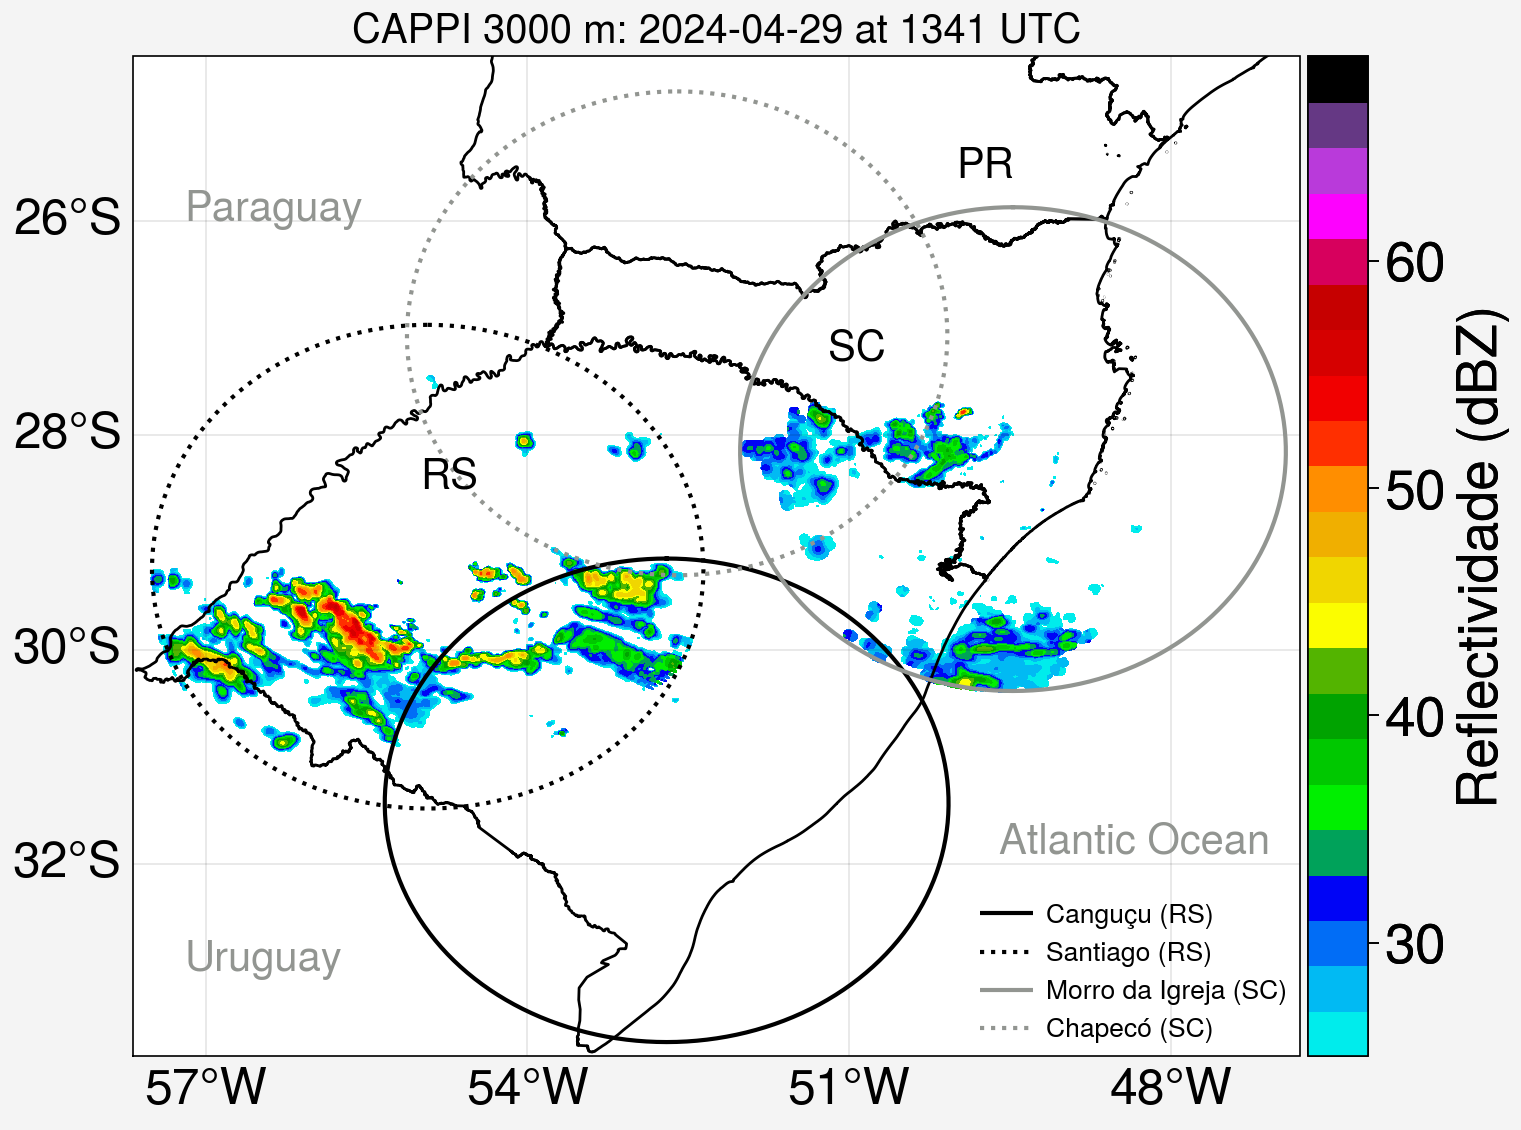

In [143]:
%%time
#========================================================================================================================#
#                                             IMPORTA BIBLIOTECAS
#========================================================================================================================#
import pyart 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import geopy                              
from geopy import distance  
import numpy as np
import os
import pandas as pd
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                        LEITURA DOS ARQUIVOS DOS RADARES
#========================================================================================================================#
# 2024-04-29 1340 UTC 
#-----------------------------------------------------------#
#                nomes dos arquivos
#-----------------------------------------------------------#
file_cangucu = 'cangucu/2024-04-29/CGU-250--2024-04-29--13-40-23.mvol'
file_santiago = 'santiago/2024-04-29/STI-250--2024-04-29--13-40-23.mvol'
file_morrodaigreja = 'morrodaigreja/2024-04-29/MDI-250--2024-04-29--13-40-24.mvol'
file_chapeco = 'chapeco/2024-04-29/217BRS-20240429134204.HDF5'

#-----------------------------------------------------------#
#                     leitura dos dados
#-----------------------------------------------------------#
radar_cangucu = pyart.aux_io.read_gamic(file_cangucu)
radar_santiago = pyart.aux_io.read_gamic(file_santiago)
radar_morrodaigreja = pyart.aux_io.read_gamic(file_morrodaigreja)
radar_chapeco = pyart.aux_io.read_gamic(file_chapeco)
#print(pd.DataFrame(radar_cangucu.fields.keys()),'\n',
#      pd.DataFrame(radar_santiago.fields.keys()), '\n',
#      pd.DataFrame(radar_morrodaigreja.fields.keys()),'\n',
#      pd.DataFrame(radar_chapeco.fields.keys()))

#-----------------------------------------------------------#
#           extração da data da imagem
#-----------------------------------------------------------#
ano = str(pyart.util.datetime_from_grid(radar_cangucu).year)
mes = str(pyart.util.datetime_from_grid(radar_cangucu).month).zfill(2)
dia = str(pyart.util.datetime_from_grid(radar_cangucu).day).zfill(2)
hor = str(pyart.util.datetime_from_grid(radar_cangucu).hour).zfill(2)
min = str(pyart.util.datetime_from_grid(radar_cangucu).minute).zfill(2)

#-----------------------------------------------------------#
#            latitude e longitude dos radares
#-----------------------------------------------------------#
lat_radar_cangucu, lon_radar_cangucu = radar_cangucu.latitude['data'][0], radar_cangucu.longitude['data'][0]
lat_radar_santiago, lon_radar_santiago = radar_santiago.latitude['data'][0], radar_santiago.longitude['data'][0]
lat_radar_morrodaigreja, lon_radar_morrodaigreja = radar_morrodaigreja.latitude['data'][0], radar_morrodaigreja.longitude['data'][0]
lat_radar_chapeco, lon_radar_chapeco = radar_chapeco.latitude['data'][0], radar_chapeco.longitude['data'][0]
#print(lat_radar_cangucu, lon_radar_cangucu)
#print(lat_radar_santiago, lon_radar_santiago)
#print(lat_radar_morrodaigreja, lon_radar_morrodaigreja)
#print(lat_radar_chapeco, lon_radar_chapeco)

#-----------------------------------------------------------#
#                 altitude dos radares
#-----------------------------------------------------------#
altitude_cangucu = radar_cangucu.altitude['data'][0]
altitude_santiago = radar_santiago.altitude['data'][0]
altitude_morrodaigreja = radar_morrodaigreja.altitude['data'][0]
altitude_chapeco = radar_chapeco.altitude['data'][0]
altitude_media = (altitude_cangucu+altitude_santiago+altitude_morrodaigreja+altitude_chapeco)/4.
#print(altitude_cangucu, altitude_santiago, altitude_morrodaigreja, altitude_chapeco, altitude_media)

#-----------------------------------------------------------#
#            define a altitude do CAPPI
#-----------------------------------------------------------#
cappi_altitude_escolhido = 3000
if (cappi_altitude < altitude_media):
    print('erro: altura do cappi menor que a altitude do radar')

# subtrai a altitude do radar
cappi_altitude = cappi_altitude_escolhido - altitude_media

#-----------------------------------------------------------#
#              definições da grade do CAPPI
#-----------------------------------------------------------#
# função que calcula a quantidade de pontos em x, y e z
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0]) / resolution)

# limites da grade
z_grid_limits = (cappi_altitude, cappi_altitude+1000)
y_grid_limits = (-500_000., 500_000.)
x_grid_limits = (-250_000., 750_000.)

# resolução da grade em metros
grid_resolution = 1000

# pontos em X, Y e Z
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
print(z_grid_points, y_grid_points, x_grid_points)

#-----------------------------------------------------------#
#                          gera cappi
#-----------------------------------------------------------#
cappi = pyart.map.grid_from_radars((radar_santiago, radar_cangucu, radar_morrodaigreja),
                                   
                                   grid_shape = (z_grid_points,
                                                 y_grid_points,
                                                 x_grid_points),
                                   
                                   grid_limits = (z_grid_limits,     # alturas
                                                  y_grid_limits,     # latitudes
                                                  x_grid_limits),    # longitudes
                                   
                                   gridding_algo = 'map_gates_to_grid',
                                   
                                   fields = ["corrected_reflectivity"])    

#-----------------------------------------------------------#
#           transforma para Dataset do Xarray
#-----------------------------------------------------------#
ds = cappi.to_xarray()

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
#-----------------------------------------------------------#
#                     mapa radar
#-----------------------------------------------------------#
# define a altura que será plotada
indice_altura = 0 #(=3000m)
altura = int(ds['z'][indice_altura] + altitude_media) #(=3000)

# cria moldura da figura
fig, ax = pplt.subplots(axheight=5, tight=True, proj='pcarree')

# exatrai os limites dos dados de cappi
lonmin, lonmax, latmin, latmax = float(ds['lon'].min()), float(ds['lon'].max()), float(ds['lat'].min()), float(ds['lat'].max())

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=2, lonlines=3,
          title = f'CAPPI {altura} m: {ano}-{mes}-{dia} at {hor}{min} UTC',
          latlim=(latmin-0.07, latmax+0.06),
          lonlim=(lonmin-0.05, lonmax+0.05),
          small='25px',
          large='20px')

# plota mapa
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['corrected_reflectivity'][0, indice_altura, :, :],
                   cmap='pyart_NWSRef',
                   levels=pplt.arange(25, 70., 2.0),
                   vmin=25, vmax=70)

#-----------------------------------------------------------#
#                  contornos dos estados
#-----------------------------------------------------------#
evm_plot_states('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp', 'black', 1.0)

#-----------------------------------------------------------#
#                plota sigla dos estados
#-----------------------------------------------------------#
plot_siglas_statesb()

#-----------------------------------------------------------#
#             aneis de distância do radar
#-----------------------------------------------------------#
evm_plota_aneis_em_geral([250], lon_radar_cangucu, lat_radar_cangucu, 'black', label='Canguçu (RS)', linestyle='solid')
evm_plota_aneis_em_geral([250], lon_radar_santiago, lat_radar_santiago, 'black', label='Santiago (RS)', linestyle='dotted')
evm_plota_aneis_em_geral([250], lon_radar_morrodaigreja, lat_radar_morrodaigreja, 'gray', label='Morro da Igreja (SC)', linestyle='solid')
evm_plota_aneis_em_geral([250], lon_radar_chapeco, lat_radar_chapeco, 'gray', label='Chapecó (SC)', linestyle='dotted')

#-----------------------------------------------------------#
#              barra de cor/legenda
#-----------------------------------------------------------#
fig.colorbar(map1, loc='r', label='Reflectividade (dBZ)', ticks=10, ticklabelsize=20, labelsize=20, width=0.3, space=0.3)

# adiciona legenda
ax.legend(loc='lr', ncols=1, frameon=False, prop={'size': 9.5}, markerscale=0.4)

#-----------------------------------------------------------#
#                        salva figura
#-----------------------------------------------------------#
plt.savefig(f'cappi_Z_4radares_proplot.png', dpi=300)